In [6]:
import os
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import georaster
from skimage.draw import polygon
import numpy as np

In [4]:
project_dir = '/home/hgamarro/DeepLearning/JB_space'
root_dir = str(project_dir) + '/data/processed/Vegas/train'
inputs = list(os.listdir(f"{root_dir}/images/"))

In [25]:
image_filename = inputs[223]

# Load image
image = np.load(os.path.join(root_dir, "images", image_filename))
# image = torch.Tensor(image).permute(2, 0, 1)[None, :, :, :] ##Converts to 1,C,H,W

# Load masks
mask = np.load(os.path.join(root_dir, "masks", image_filename.replace(".npy", "_mask.npy")))
mask = (mask > 0).astype(np.int32)


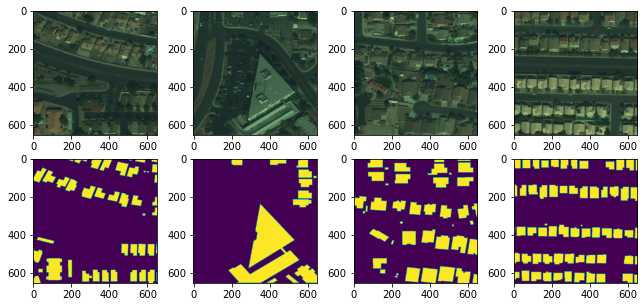

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(11, 5))
# fig.subplots_adjust(hspace=0.1)

for a in np.arange(0,4):
    
    image_filename = inputs[a+15]

    # Load image
    image = np.load(os.path.join(root_dir, "images", image_filename))
    # image = torch.Tensor(image).permute(2, 0, 1)[None, :, :, :] ##Converts to 1,C,H,W

    # Load masks
    mask = np.load(os.path.join(root_dir, "masks", image_filename.replace(".npy", "_mask.npy")))
    mask = (mask > 0).astype(np.int32)

    axes[0, a].imshow( image)
    axes[1, a].imshow( mask)

In [10]:
image_filename = inputs[223]

# Load image
image = np.load(os.path.join(root_dir, "images", image_filename))
image = torch.Tensor(image).permute(2, 0, 1)[None, :, :, :] ##Converts to 1,C,H,W

# Load masks
mask = np.load(os.path.join(root_dir, "masks", image_filename.replace(".npy", "_mask.npy")))
mask = (mask > 0).astype(np.int32)
mask = torch.Tensor(mask)[None, None, :, :] ##1, 1, H, W

In [11]:
# Convert image to [0 1] and C, H, W
image = image.squeeze()
image = image.float() / 255.0 # Converts image from [0 255] to [0 1] fp

# Mask of shape H, W
mask = torch.ceil(mask).squeeze()

batch = {'image': image, 'mask': mask, 'name': [image_filename.replace(".npy", "")]}